 ## Import the libraries

 ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

## Loading the data

---

In [2]:
df = pd.read_csv('/content/weather-sa-2017-2019-clean.csv')
df.shape

(249023, 15)

In [3]:
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


## data cleaning

---

In [22]:
# convert date to datetime type
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Unnamed: 0 is irrlevent 
delete_col =['Unnamed: 0']
df.drop(delete_col, axis =1 , inplace =True)

In [6]:
# convert feature humidity to Numerical
df['humidity'] = df['humidity'].str.replace('%',' ').astype('float')

In [23]:
# Check duplicate 
duplicate = df.index.duplicated()
print(duplicate.sum())

0


In [7]:
df.isnull().sum()

city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

Dealing with missing values

In [ ]:
#   OR
# drop null in rows 
#df = df.dropna()
#df.isnull().sum()

In [8]:
# now filling the missing values with means for each city
df['humidity'] = df['humidity'].fillna(df.groupby('city')['humidity'].transform('mean'))


In [9]:
df['barometer'] = df['barometer'].fillna(df.groupby('city')['barometer'].transform('mean'))

In [10]:
df.isnull().sum()

city          0
date          0
time          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

In [11]:
df.describe()


,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,37.553192,1015.454041,11.053453
std,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,23.592329,6.970366,7.053005
min,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,55.000000,1021.000000,16.000000
max,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,100.000000,1101.000000,161.000000


## Target
---

In [12]:
df['weather'].unique()


array(['Clear ', 'Sunny ', 'Scattered clouds ', 'Partly sunny ',
       'Passing clouds ', 'Refreshingly cool ', 'Low level haze ',
       'Duststorm ', 'Thunderstorms  Passing clouds ', 'Fog ',
       'Thunderstorms  Partly sunny ', 'Light rain  Partly sunny ',
       'Dense fog ', 'Thunderstorms  Scattered clouds ',
       'Rain  Passing clouds ', 'Extremely hot ', 'Rain  Partly sunny ',
       'Pleasantly warm ', 'Hot ', 'Mild ', 'Overcast ',
       'Rain  Overcast ', 'Smoke ', 'Thunderstorms  Broken clouds ',
       'Heavy rain  Partly sunny ', 'Thunderstorms  Overcast ',
       'Light rain  Overcast ', 'Warm ', 'Thunderstorms  Cloudy ',
       'Drizzle  Overcast ', 'Thunderstorms  Partly cloudy ',
       'Broken clouds ', 'Sandstorm ', 'Partly cloudy ', 'Mostly cloudy ',
       'Rain  Partly cloudy ', 'Rain  Broken clouds ',
       'Rain  Scattered clouds ', 'Haze ', 'Rain  Mostly cloudy ',
       'Hail  Partly sunny ', 'Thundershowers  Passing clouds ',
       'Thunderstorms  Mor

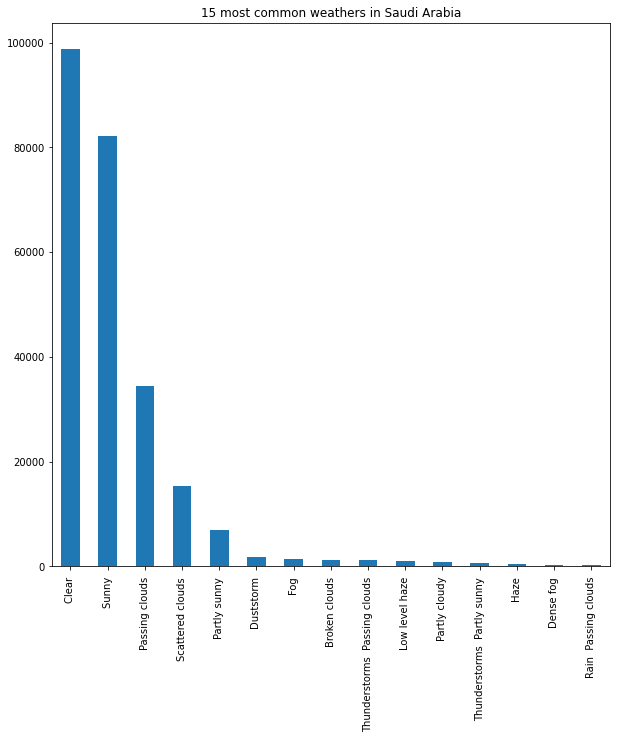

In [14]:
plt.figure(figsize=(10,10))
df['weather'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers in Saudi Arabia')
plt.show()

Clear and Sunny are most common weatehrs conditions in Saudi Arabia.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


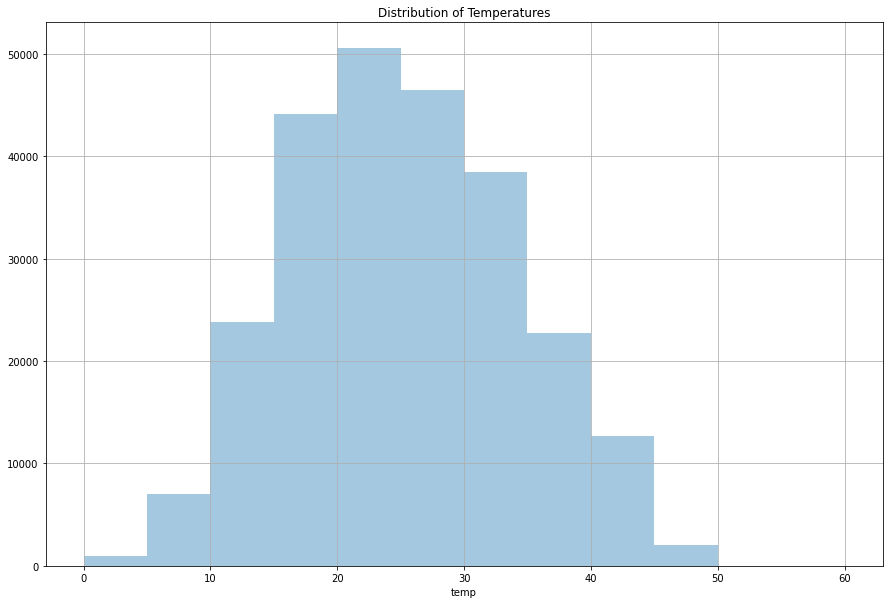

In [21]:
plt.figure(figsize=(15, 10))
sns.distplot(df['temp'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid();


Most common temperature scale in Saudi Arabia is from 20 to 25 degree.

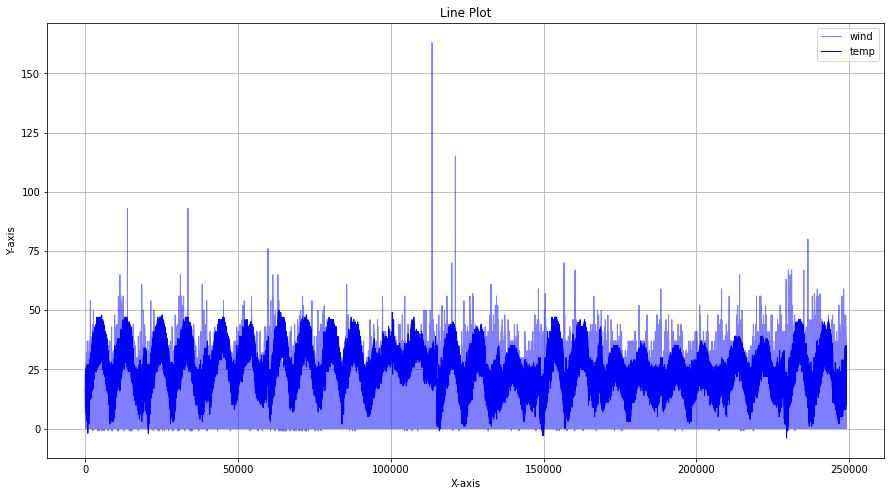

In [29]:
df.wind.plot(kind = 'line', color = "blue", label = "wind", figsize = (15,8),
                        linewidth = 1, alpha = 0.5, grid = True, linestyle = "-")

df.temp.plot(kind = 'line', color = "blue", label = "temp", figsize = (15,8),
                            linewidth = 1, alpha = 1, grid = True, linestyle = "-")
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line Plot")
plt.show()

## Time Series Analysis

---
